In [1]:
import numpy
import logging
import pycbc
from pycbc.inference import io
from pycbc.inference import models

In [2]:
%matplotlib notebook
from matplotlib import pyplot

In [3]:
pycbc.init_logging(True)

In [4]:
fn = '../BH-Spectroscopy-GW190521/posteriors/kerr/220_330/KERR-220_330-07MS.hdf'
fp = io.loadfile(fn, 'r')

In [5]:
cp = fp.read_config_file()
cp.set('data', 'psd-estimation', 'median')

In [6]:
model = models.read_from_config(cp)

2021-08-25 17:59:11,516 Setting up priors for each parameter
2021-08-25 17:59:11,519 No sampling_params section read from config file
2021-08-25 17:59:11,520 Loading waveform transforms
2021-08-25 17:59:11,529 Determining analysis times to use
2021-08-25 17:59:11,530 Padding H1 analysis start and end times by 4 (= psd-inverse-length/2) seconds to account for PSD wrap around effects.
2021-08-25 17:59:11,531 Padding L1 analysis start and end times by 4 (= psd-inverse-length/2) seconds to account for PSD wrap around effects.
2021-08-25 17:59:11,531 Padding V1 analysis start and end times by 4 (= psd-inverse-length/2) seconds to account for PSD wrap around effects.
2021-08-25 17:59:11,533 Reading Frames
2021-08-25 17:59:28,691 Highpass Filtering
2021-08-25 17:59:28,703 Resampling data
2021-08-25 17:59:28,912 Converting to float64
2021-08-25 17:59:28,914 Highpass Filtering
2021-08-25 17:59:28,918 Remove Padding
2021-08-25 17:59:28,921 Reading Frames
2021-08-25 17:59:45,564 Highpass Filterin

In [7]:
samples = fp.read_samples(list(fp['samples'].keys()))

In [8]:
samples.fieldnames

('tau330',
 'lognl',
 'loglikelihood',
 'logamp220',
 'f330',
 'amp330',
 'f220',
 'final_spin',
 'logwt',
 'amp220',
 'loglikelihood330',
 'inclination',
 'polarization',
 'tau220',
 'final_mass',
 'phi220',
 'phi330',
 'loglikelihood220')

In [9]:
maxidx = samples.loglikelihood.argmax()
params = {p: samples[p][maxidx] for p in model.variable_params}

In [10]:
model.update(**params)
print(model.loglikelihood)

-1240538.0178716795


In [11]:
samples.loglikelihood[maxidx]

-1240538.0178223755

In [12]:
psds = fp.read_psds()
model_psds = model.psds

<IPython.core.display.Javascript object>


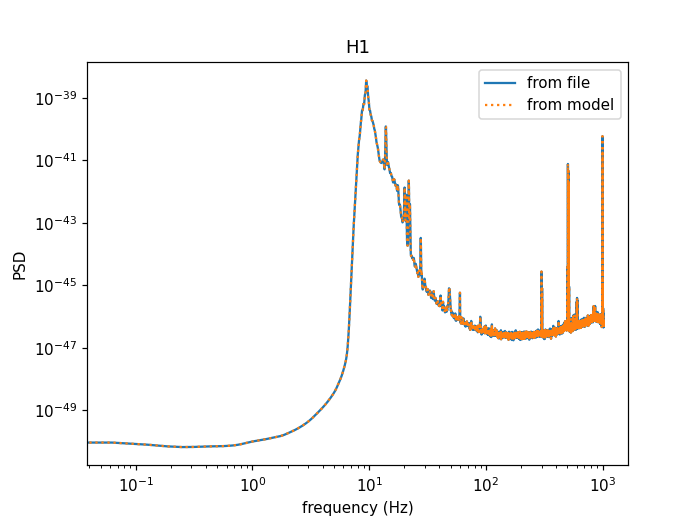

<IPython.core.display.Javascript object>


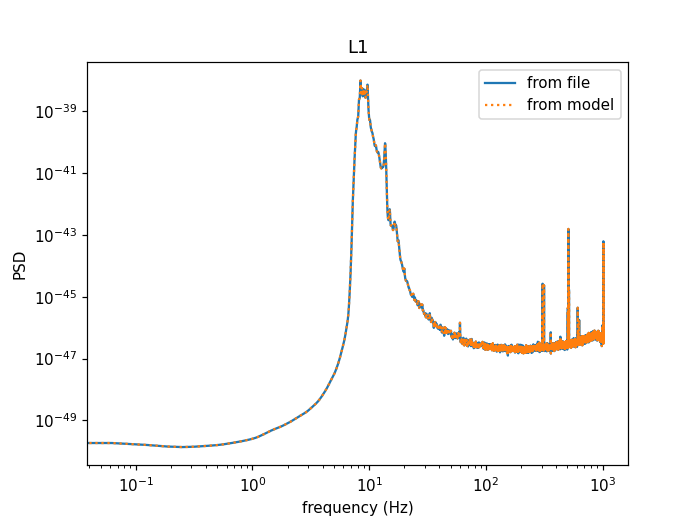

<IPython.core.display.Javascript object>


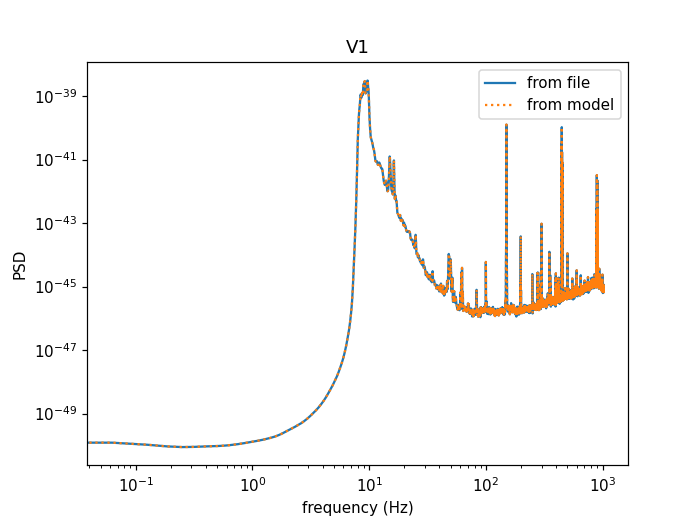

In [13]:
for ifo, p in psds.items():
    fig, ax = pyplot.subplots()
    ax.loglog()
    ax.plot(p.sample_frequencies, p, label='from file')
    ax.plot(model_psds[ifo].sample_frequencies, model_psds[ifo], ls=':', label='from model')
    ax.legend()
    ax.set_title(ifo)
    ax.set_xlabel('frequency (Hz)')
    ax.set_ylabel('PSD')
    fig.show()

In [14]:
model.lognl

-1240615.821589215

In [15]:
samples.lognl[maxidx]

-1240615.8215411154

In [16]:
model.loglr

77.80371753545478

In [17]:
samples.loglikelihood[maxidx] - samples.lognl[maxidx]

77.8037187398877

In [18]:
model.lognl - samples.lognl[maxidx]

-4.809955134987831e-05

In [19]:
model.loglikelihood - samples.loglikelihood[maxidx]

-4.930398426949978e-05

In [20]:
model.psds

{'H1': <pycbc.types.frequencyseries.FrequencySeries at 0x7f688f405978>,
 'L1': <pycbc.types.frequencyseries.FrequencySeries at 0x7f688f405a20>,
 'V1': <pycbc.types.frequencyseries.FrequencySeries at 0x7f688f405b00>}